In [1]:
from piper import piper
from piper.defaults import *
from piper.verbs import *

piper version 0.0.7, last run: Friday, 19 February 2021 12:06:35


In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')
head(df)

891 rows, 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [3]:
combine_header_rows(info(df).T)

Dataframe with (rows, cols) (891, 15) consumes 0.31 Mb


,survived int64,pclass int64,sex object,age float64,sibsp int64,parch int64,fare float64,embarked object,class category,who object,adult_male bool,deck category,embark_town object,alive object,alone bool
unique,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
isna,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
isnull,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
total_count,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891


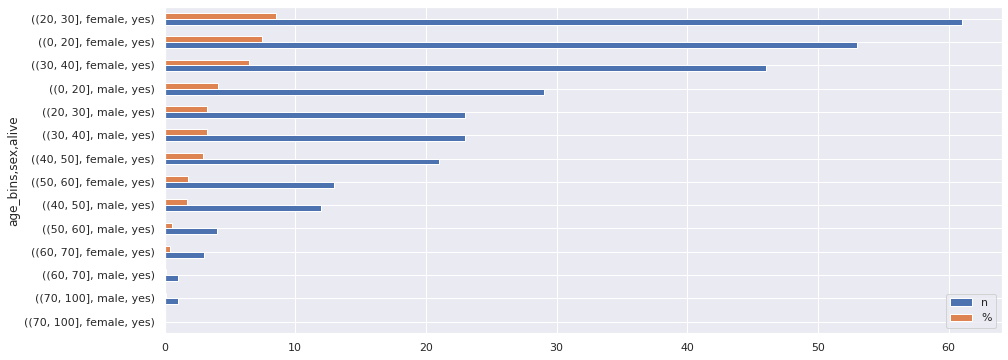

In [4]:
df['age_bins'] = pd.cut(df.age, bins=[0, 20, 30, 40, 50, 60, 70, 100])

fig, ax = plt.subplots(figsize=(15, 6))
(counts(df, ['age_bins', 'sex', 'alive'], sort_values=True, percent=True, round=5)
 .query("alive == 'yes'")
 .plot(ax=ax, kind='barh')
);

In [5]:
adorn(count(df, 'age', percent=True, round=5), ignore_row_index=True)

,age,n,%
0,NaN,177,19.86532
1,24.0,30,3.36700
2,22.0,27,3.03030
3,18.0,26,2.91807
4,28.0,25,2.80584
...,...,...,...
85,34.5,1,0.11223
86,66.0,1,0.11223
87,14.5,1,0.11223
88,0.92,1,0.11223


In [6]:
adorn(count(df, 'pclass', percent=True, round=5), ignore_row_index=True)

,pclass,n,%
0,3,491,55.10662
1,1,216,24.24242
2,2,184,20.65095
3,All,891,99.99999


In [7]:
adorn(count(df, 'class', percent=True, round=5), ignore_row_index=True)

,class,n,%
0,Third,491,55.10662
1,First,216,24.24242
2,Second,184,20.65095
3,All,891,99.99999


In [8]:
adorn(count(df, 'who', percent=True, round=5), ignore_row_index=True)

,who,n,%
0,man,537,60.26936
1,woman,271,30.41526
2,child,83,9.31538
3,All,891,100.00000


In [9]:
adorn(count(df, 'sex', percent=True, round=5), ignore_row_index=True)

,sex,n,%
0,male,577,64.7587
1,female,314,35.2413
2,All,891,100.0000
